<a href="https://colab.research.google.com/github/Anusarakh/DPDM2021/blob/main/Frequent_Patterns_(Association_Rules).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

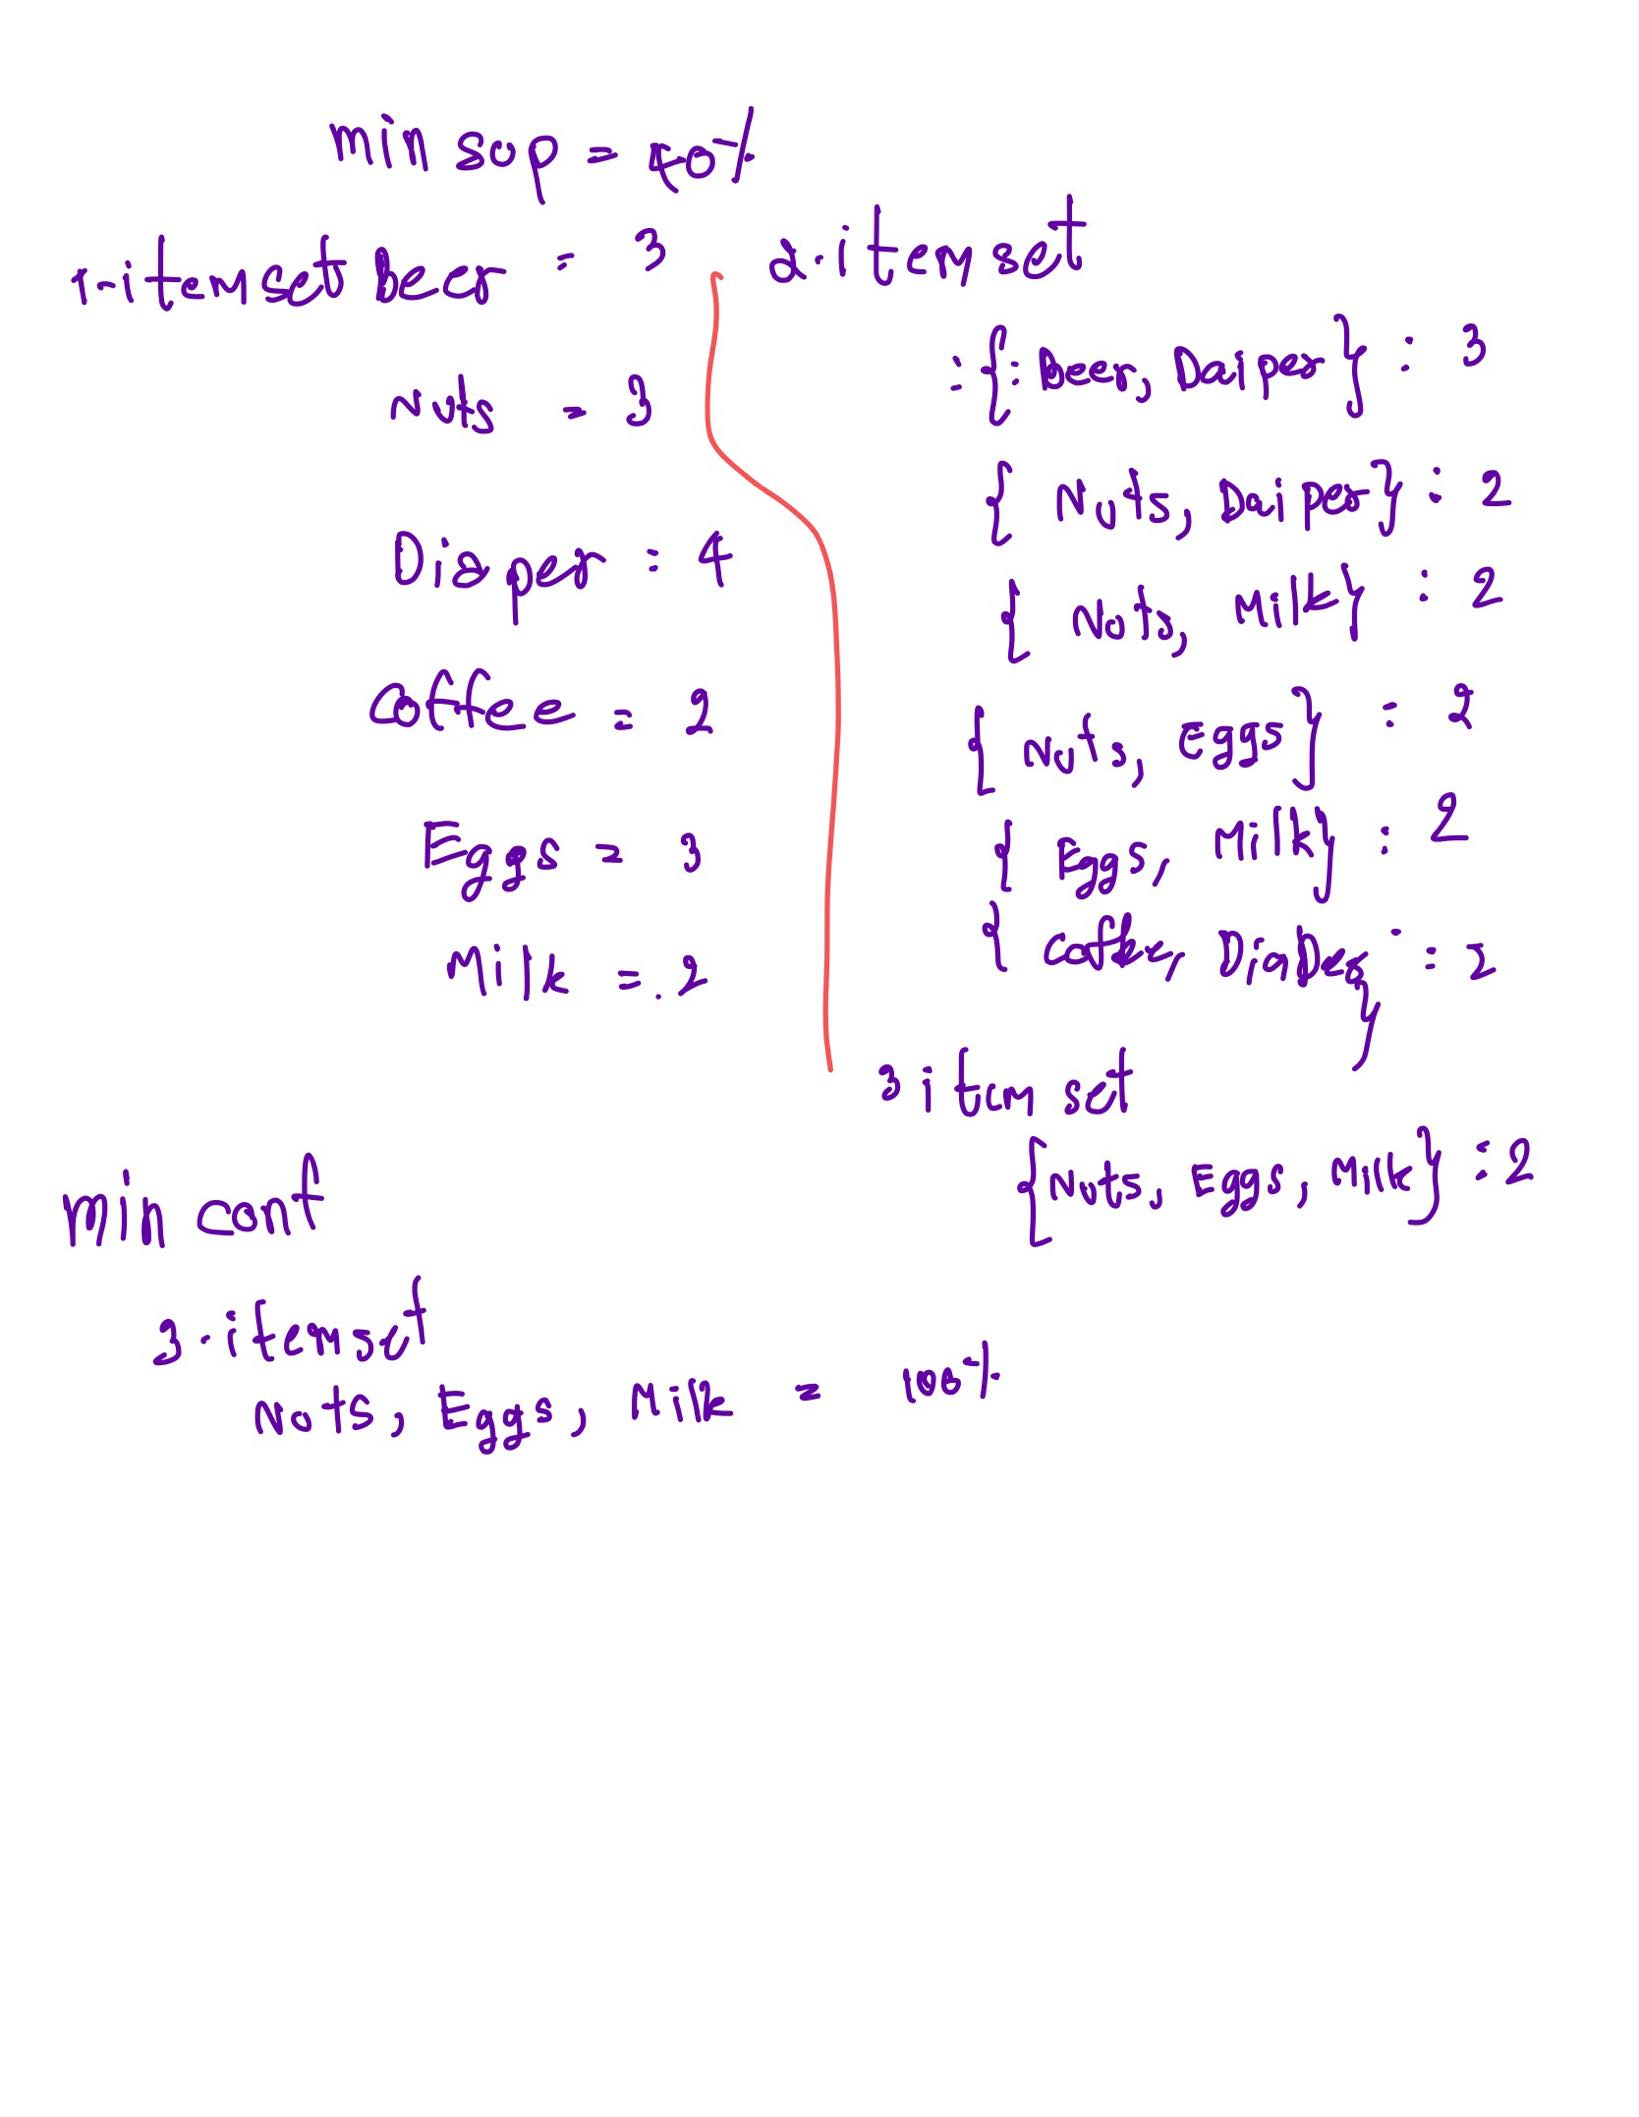

In [85]:
import pandas as pd 

In [86]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import os

In [88]:
path = '/content/drive/My Drive/DPDM2021_DATA/' # เรียกข้อมูลจาก Drive 
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin-1')

In [185]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [186]:
data.groupby('InvoiceNo')['StockCode'].apply(list)

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
C581484                                              [23843]
C581490                                       [22178, 23144]
C581499                                                  [M]
C581568                                              [21258]
C581569                                       [84978, 20979]
Name: StockCode, Length: 25900, dtype: object

### จดการข้อมูลก่อนนำไปใช้

In [91]:
data[data['InvoiceNo']=='C581490']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12/09/2011 09:57,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,0.83,14397.0,United Kingdom


In [92]:
data_remove_c = data[data['Quantity']>0]
data_remove_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [93]:
data_remove_c.groupby('InvoiceNo')['StockCode'].apply(list)

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
581586                          [22061, 23275, 21217, 20685]
581587     [22631, 22556, 22555, 22728, 22727, 22726, 227...
A563185                                                  [B]
A563186                                                  [B]
A563187                                                  [B]
Name: StockCode, Length: 20728, dtype: object

In [94]:
transactions = data.groupby('InvoiceNo')['StockCode'].apply(list)

(Quiz 11)
1. suppermarket มีสาขาในกี่ประเทศ
2.วาดกราฟยอดขายของแต่ละประเทศ
3.วาดกราฟ จำนวนสมาชิกแต่ละประเทศ 
3.หา Association Rules ที่น่าสนใจโดยพิจารณาลูกค้ารายบุคคล

### Quiz ข้อ 1 suppermarket มีสาขาในกี่ประเทศ

In [95]:
A = data_remove_c.groupby('Country').sum().sort_values(by=['Country'],ascending=False).reset_index()
A

,Country,Quantity,UnitPrice,CustomerID
0,Unspecified,3300,1.204010e+03,3.348046e+06
1,United Kingdom,4733819,1.845444e+06,5.510928e+09
2,United Arab Emirates,982,2.298900e+02,1.018952e+06
3,USA,2458,4.133000e+02,2.260641e+06
4,Switzerland,30630,6.634360e+03,2.332474e+07
5,Sweden,36083,1.695790e+03,6.637579e+06
6,Spain,27951,9.504340e+03,3.208028e+07
7,Singapore,5241,1.294999e+04,2.829168e+06
8,Saudi Arabia,80,2.116000e+01,1.130850e+05
9,RSA,352,2.481000e+02,7.218680e+05


In [96]:
print(len(A))

38


### Quiz ข้อ 2 วาดกราฟยอดขายของแต่ละประเทศ

#### แทรกตารางราสินค้าทั้งหมด

In [144]:
data_remove_c['C'] = data_remove_c['Quantity']*data_remove_c['UnitPrice'] # สร้างตารางขึ้นใหม่โดยจำนวนยอดขาย*จำนวนunit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
data_remove_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,C
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60


In [146]:
B = data_remove_c.groupby(by ='Country').sum().sort_values(by='C', ascending=False).reset_index()
B

,Country,Quantity,UnitPrice,CustomerID,C
0,United Kingdom,4733819,1.845444e+06,5.510928e+09,9.003098e+06
1,Netherlands,200937,6.247730e+03,3.407895e+07,2.854463e+05
2,EIRE,147447,3.848995e+04,1.067247e+08,2.834540e+05
3,Germany,119263,3.353214e+04,1.143723e+08,2.288671e+05
4,France,112104,3.699279e+04,1.057630e+08,2.097151e+05
5,Australia,84209,3.612500e+03,1.475853e+07,1.385213e+05
6,Spain,27951,9.504340e+03,3.208028e+07,6.157711e+04
7,Switzerland,30630,6.634360e+03,2.332474e+07,5.708990e+04
8,Belgium,23237,7.372850e+03,2.524670e+07,4.119634e+04
9,Sweden,36083,1.695790e+03,6.637579e+06,3.837833e+04


In [147]:
labels = list(B['Country'])
price = list(B['C'])

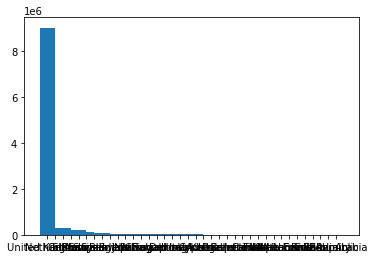

In [148]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(labels , price , width=2)
labels = ax.get_xticklabels()

### Quiz ข้อ3 วาดกราฟ จำนวนสมาชิกแต่ละประเทศ 

In [149]:
data_remove_c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,C
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60


In [150]:
c = data_remove_c.groupby(by ='Country').count().sort_values(by='InvoiceNo', ascending=False).reset_index()
c = c[['Country','InvoiceNo']]
c

,Country,InvoiceNo
0,United Kingdom,486286
1,Germany,9042
2,France,8408
3,EIRE,7894
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1967
8,Portugal,1501
9,Australia,1185


In [165]:
labels = list(c['Country'])
total = list(c['InvoiceNo'])

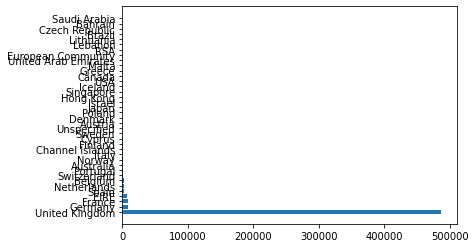

In [168]:
plt.barh(labels,total)
plt.show()

### Association Rules

In [175]:
!pip install apyori

In [176]:
from apyori import apriori

In [177]:
frequentItemsets = list(apriori(transactions,min_support = 0.03))
frequentItemsets 

[RelationRecord(items=frozenset({'20712'}), support=0.033667953667953665, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20712'}), confidence=0.033667953667953665, lift=1.0)]),
 RelationRecord(items=frozenset({'20719'}), support=0.03254826254826255, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719'}), confidence=0.03254826254826255, lift=1.0)]),
 RelationRecord(items=frozenset({'20724'}), support=0.04054054054054054, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20724'}), confidence=0.04054054054054054, lift=1.0)]),
 RelationRecord(items=frozenset({'20725'}), support=0.062084942084942085, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.062084942084942085, lift=1.0)]),
 RelationRecord(items=frozenset({'20726'}), support=0.04003861003861004, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozense

In [178]:
frequentItemsets[-1]

RelationRecord(items=frozenset({'22699', '22697'}), support=0.03027027027027027, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.03027027027027027, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])

items=frozenset({'22699', '22697'}), support=0.03027027027027027

ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.03027027027027027, lift=1.0)



In [179]:
frequentItemsets = list(apriori(transactions,min_support = 0.02))
frequentItemsets[-1]

RelationRecord(items=frozenset({'22698', '22699', '22697'}), support=0.021196911196911198, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22698', '22699', '22697'}), confidence=0.021196911196911198, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22698', '22699'}), confidence=0.5193945127719962, lift=21.909312509437626), OrderedStatistic(items_base=frozenset({'22698'}), items_add=frozenset({'22699', '22697'}), confidence=0.6845386533665836, lift=22.614223370146064), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22698', '22697'}), confidence=0.4901785714285714, lift=19.71370341614907), OrderedStatistic(items_base=frozenset({'22698', '22697'}), items_add=frozenset({'22699'}), confidence=0.8524844720496895, lift=19.71370341614907), OrderedStatistic(items_base=frozenset({'22699', '22697'}), items_add=frozenset({'22698'}), confidence=0.7002551020408164, lift=22.614223370146068), OrderedStatistic

items=frozenset({'22698', '22699', '22697'}), support=0.021196911196911198

ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22698', '22699', '22697'}), confidence=0.021196911196911198, lift=1.0)

OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22698', '22699'}), confidence=0.5193945127719962, lift=21.909312509437626)

### Quiz ข้อ 4

In [180]:
Itemsets = data_remove_c.groupby('CustomerID')['StockCode'].apply(list).reset_index()
Itemsets

,CustomerID,StockCode
0,12346.0,[23166]
1,12347.0,"[85116, 22375, 71477, 22492, 22771, 22772, 227..."
2,12348.0,"[84992, 22951, 84991, 84991, 21213, 21213, 226..."
3,12349.0,"[23112, 23460, 21564, 21411, 21563, 22131, 221..."
4,12350.0,"[21908, 22412, 79066K, 79191C, 22348, 84086C, ..."
...,...,...
4334,18280.0,"[82484, 22180, 22467, 22725, 22727, 22495, 223..."
4335,18281.0,"[22037, 22716, 22028, 23007, 23008, 23209, 22467]"
4336,18282.0,"[21270, 23187, 23295, 22089, 21108, 21109, 224..."
4337,18283.0,"[22356, 20726, 22384, 22386, 20717, 20718, 850..."


#### 2% ของลูกค้าทั้งหมดจะเลือกซื้อสินค้าพร้อมกัน 3 ชนิด

In [193]:
Itemsets = list(apriori(transactions,min_support = 0.02)) # 0.02 คิอ จำนวน2% ของลูกค้าทั้งหมด
Itemsets[-1]  # นับจากด้านล่างสุด

RelationRecord(items=frozenset({'22698', '22699', '22697'}), support=0.021196911196911198, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22698', '22699', '22697'}), confidence=0.021196911196911198, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22698', '22699'}), confidence=0.5193945127719962, lift=21.909312509437626), OrderedStatistic(items_base=frozenset({'22698'}), items_add=frozenset({'22699', '22697'}), confidence=0.6845386533665836, lift=22.614223370146064), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22698', '22697'}), confidence=0.4901785714285714, lift=19.71370341614907), OrderedStatistic(items_base=frozenset({'22698', '22697'}), items_add=frozenset({'22699'}), confidence=0.8524844720496895, lift=19.71370341614907), OrderedStatistic(items_base=frozenset({'22699', '22697'}), items_add=frozenset({'22698'}), confidence=0.7002551020408164, lift=22.614223370146068), OrderedStatistic

items=frozenset({'22698', '22699', '22697'}), support=0.021196911196911198

ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22698', '22699', '22697'})confidence=0.021196911196911198, lift=1.0)

OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22698', '22699'}), confidence=0.5193945127719962, lift=21.909312509437626)

#### จากค่า confidence ที่สูงที่สุด ลูกค้าที่ซื้อสินค้า GREEN REGENCY TEACUP (22697) AND SAUCER และ PINK REGENCY TEACUP AND SAUCER (22698) มักจะซื้อ  ROSES REGENCY TEACUP AND SAUCER (22699) ไปด้วย 

OrderedStatistic(items_base=frozenset({'22698', '22699'}), items_add=frozenset({'22697'}), confidence=0.8941368078175896, lift=21.909312509437626)]]

In [182]:
list(Itemsets[-1])

[frozenset({'22697', '22698', '22699'}),
 0.021196911196911198,
 [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22698', '22699', '22697'}), confidence=0.021196911196911198, lift=1.0),
  OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22698', '22699'}), confidence=0.5193945127719962, lift=21.909312509437626),
  OrderedStatistic(items_base=frozenset({'22698'}), items_add=frozenset({'22699', '22697'}), confidence=0.6845386533665836, lift=22.614223370146064),
  OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22698', '22697'}), confidence=0.4901785714285714, lift=19.71370341614907),
  OrderedStatistic(items_base=frozenset({'22698', '22697'}), items_add=frozenset({'22699'}), confidence=0.8524844720496895, lift=19.71370341614907),
  OrderedStatistic(items_base=frozenset({'22699', '22697'}), items_add=frozenset({'22698'}), confidence=0.7002551020408164, lift=22.614223370146068),
  OrderedStatistic(items_base=frozenset({'22698', '

#### หาชื่อสินค้า ตามรหัส

In [188]:
data[data['StockCode']=='22697'].iloc[0,2] 

'GREEN REGENCY TEACUP AND SAUCER'

In [189]:
data[data['StockCode']=='22698'].iloc[0,2] 

'PINK REGENCY TEACUP AND SAUCER'

In [190]:
data[data['StockCode']=='22699'].iloc[0,2] 

'ROSES REGENCY TEACUP AND SAUCER '